In [1]:
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from numpy import expand_dims


ModuleNotFoundError: No module named 'keras'

In [0]:
model = VGG16()
model.summary()

In [5]:
#Iterating through the layers of the model and printing the shape of feature maps of each conv layer.

for i in range(len(model.layers)):
    if 'conv' not in model.layers[i].name:
        continue
    else:
        print(i, model.layers[i].name, model.layers[i].output.shape)

1 block1_conv1 (?, 224, 224, 64)
2 block1_conv2 (?, 224, 224, 64)
4 block2_conv1 (?, 112, 112, 128)
5 block2_conv2 (?, 112, 112, 128)
7 block3_conv1 (?, 56, 56, 256)
8 block3_conv2 (?, 56, 56, 256)
9 block3_conv3 (?, 56, 56, 256)
11 block4_conv1 (?, 28, 28, 512)
12 block4_conv2 (?, 28, 28, 512)
13 block4_conv3 (?, 28, 28, 512)
15 block5_conv1 (?, 14, 14, 512)
16 block5_conv2 (?, 14, 14, 512)
17 block5_conv3 (?, 14, 14, 512)


In [0]:
# We can define a new model that outputs a feature map from the first convolutional layer (index 1) as follows
'''
  Model_conv1:
    Input Layer: input_1
    Output Layer: block1_conv1 
'''

model_conv1 = Model(inputs = model.input, outputs = model.layers[1].output)

In [17]:
#Load the image and resize to the expected size i.e. 224 x 224
from google.colab import files
uploaded = files.upload()


Saving bird.jpg to bird.jpg


In [0]:
'''
  1. Upload the image
  2. Create an image array
  3. Expand the dimestions from 3D to 4D accdn to (samples, rows, cols, channels)
  4. Preprocess the input
'''

#Upload
img = load_img('bird.jpg', target_size=(224, 224))

#Create Array
img = img_to_array(img)

#Expand Dims
img = expand_dims(img, axis = 0)

#Preprocess the Input
img = preprocess_input(img)




In [25]:
print(img.shape, type(img))

(1, 224, 224, 3) <class 'numpy.ndarray'>


In [0]:
#Get the feature map by making the prediction
feature_map = model_conv1.predict(img)


In [28]:
feature_map.shape

(1, 224, 224, 64)

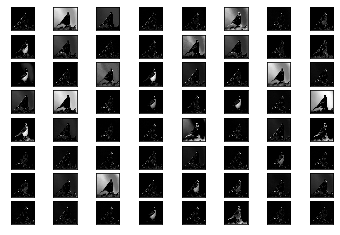

In [32]:
'''
  From model.summary(), we have "block1_conv1 (?, 224, 224, 64)" which implies 64 feature maps for the first layer.
'''

# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_map[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()


In [33]:
#Generalizing the process for all the last conv layer in each block of the network
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

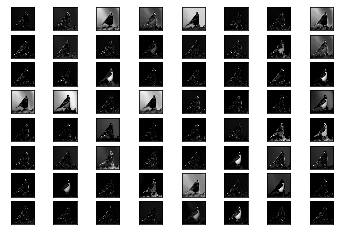

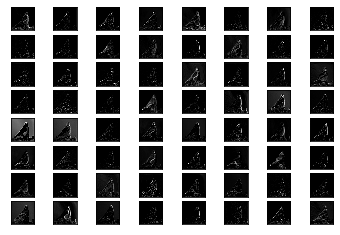

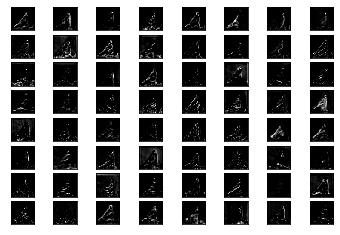

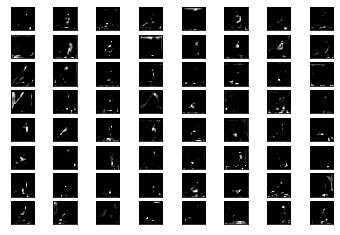

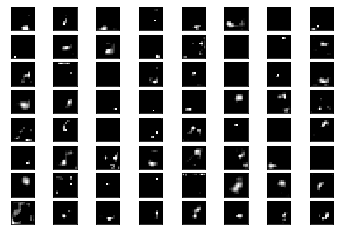

In [42]:
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = plt.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	plt.show()